# Lab 02: Exploring 50 Reuter Authors 

Erik Gabrielsen, Danh Nguyen 

## Business Understanding

In this lab we are exploring the [Reuters 50 50](https://archive.ics.uci.edu/ml/datasets/Reuter_50_50) Dataset from the UCI Repository. The dataset includes a training set and a test set, each containing 50 works of 50 different authors, for a total of 2500 articles. This dataset allows us to explore the field of authorship identification, and seeing how different authors write. According to UCI, the articles chosen are under the "corporate/industrial" subtopic to reduce the ability to distinguish through topics. However, since the topic is still very broad and authors may cover different regions of the world, we will see if we can readily distinguish differences in their words. Authors may be identifiable through certain types of words and expressions common throughout their work but not in others' works. We will only be visualizing the training set (C50training) in this lab, but the dataset will save us steps in building classification models and testing them later on. Furthermore, we may use this data to predict biases or sentiments in different authors and compare them.

In [1]:
import pandas as pd
import numpy as np
import os
from scipy.misc import imread
import matplotlib.pyplot as plt
import random
import warnings
import seaborn as sns


directory = os.path.expanduser('~/Downloads/C50/C50train/')
articles = []
authors = []

# loop over directories: 
for author in os.listdir(directory):
    folder = os.path.join(directory, author)
    
    # loop over files in folder
    for filename in os.listdir(folder):
        with open(os.path.join(folder, filename)) as f:
            articles.append(f.read()) # append to array
            authors.append(author)

## Data Encoding

In [2]:
import re
from nltk.corpus import stopwords
cachedStopWords = stopwords.words('english')

cleaned_articles = []
for item in articles:
    letters = re.sub("[^a-zA-Z]", " ", item)
    lower_case = letters.lower()
    text = ' '.join([word for word in lower_case.split() if word not in cachedStopWords])
    cleaned_articles.append(text)

### Bag of Words

In [3]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer() # an object capable of counting words in a document!

bag_words = count_vect.fit_transform(cleaned_articles)

In [4]:
print(bag_words.shape) # this is a sparse matrix
print('=========')
# print(bag_words[0])

(2500, 27343)


In [5]:
pd.options.display.max_columns = 999
df_frequency = pd.DataFrame(data=bag_words.toarray(),columns=count_vect.get_feature_names())

df_frequency.head()

,aa,aaa,aah,aaron,aart,ab,aba,abadoning,abandon,abandoned,abandoning,abated,abating,abb,abbey,abbott,abbreviated,abc,abdelkader,abdicating,abdidjan,abducted,abduction,abductions,abdulaziz,abdureschit,abel,abelardo,abercrombie,aberdeen,abettors,abf,abhishek,abhor,abhorred,abhorrence,abhors,abi,abide,abides,abiding,abidjan,abile,abilities,ability,abishek,abject,ablait,ablaze,able,abn,abnomals,abnormal,abnormally,abnormals,abnornals,abnornmal,aboard,abode,abolish,abolished,abolishing,abolition,abominable,aboput,aboriginal,abormal,aborted,abortive,abound,abounded,abounds,abraham,abril,abroad,abrupt,abruptly,abseil,absence,absent,absolute,absolutely,absorb,absorbable,absorbed,absorbing,absorbs,abstain,abstained,abstruse,absurd,abu,abundance,abundant,abundantly,abuse,abused,abuses,abusing,abuts,abuzz,abysmal,ac,acacia,academia,academic,academics,academy,acapulco,acc,accc,acccess,accelerate,accelerated,accelerates,accelerating,acceleration,accelerator,accelerators,accellerator,accent,accents,accentuated,accept,acceptability,acceptable,acceptance,acceptances,accepted,accepting,acceptors,accepts,accesion,access,accessed,accessible,accessing,accession,accessories,accident,accidental,accidents,acclaimed,acclerate,accolades,accolate,accommodate,accommodating,accommodation,accomodate,accomodating,accomodation,accompanied,accompany,accompanying,accompli,accomplices,accomplish,accomplished,accomplishing,accomplishments,accontancy,accord,accordance,accorded,according,accordingly,accords,account,accountability,accountable,accountancy,accountant,accountants,accounted,accounting,accountings,accounts,accreditation,accredited,accretive,accross,accrue,accruing,accumlated,accumulate,accumulated,accuracy,accurate,accurately,accusation,accusations,accuse,accused,accuses,accusing,accustomed,ace,acer,aces,acess,aches,achievable,achieve,achieved,achievement,achievements,achieving,achilles,achinsk,achinsky,acid,acidity,acids,acitivity,acknowledge,acknowledged,acknowledgement,acknowledges,acknowledging,acknowledgment,acknowleged,acmi,acount,acounts,acoustic,acpc,acquainted,acquire,acquired,acquirer,acquirers,acquiring,acquiror,acquirors,acquisition,acquisitions,acquisitive,acquistion,acquittal,acquitted,acqusiiton,acqusisitions,acqusition,acqusitions,acre,acres,acrimonious,acrobat,acronym,across,acrylic,acrylonitrile,acs,act,acted,acting,action,actionnaires,actions,activate,activated,active,actively,actives,activex,activision,activism,activist,activists,activites,activities,activity,acton,actor,actors,actress,acts,actual,actualise,actually,actuaries,actuary,actuators,acute,acutely,ad,adacte,adam,adamant,adamantly,adams,adande,adapt,adaptable,adaptations,adaptec,adapted,adapter,adapters,adapting,adaption,adb,add,addded,added,addicted,addiction,addictive,addicts,adding,addition,additional,additionally,additions,additive,additives,address,addressed,addresses,addressing,adds,adef,adelaide,adelman,adept,adequacy,adequate,adequately,adhere,adhered,adherents,adhesive,adhesives,adiake,adidas,adjacent,adjoining,adjoins,adjourn,adjourned,adjourning,adjournment,adjust,adjustable,adjusted,adjusting,adjustment,adjustments,adm,administartion,administer,administered,administers,administration,administrations,administrative,administratively,administrator,administrators,adminstration,adminstrative,admiral,admire,admired,admirer,admission,admissions,admit,admits,admittance,admitted,admittedly,admitting,adobe,adolescent,adolf,adolph,adome,adopt,adopted,adopting,adoption,adopts,adorded,adorned,adr,adressing,adrian,adriano,adrift,adroh,adrs,ads,adss,adt,adulation,adulatory,adult,adults,advance,advanced,advancers,advances,advancing,advantage,advantageous,advantages,advent,adventure,adventurers,adventurous,adversaries,adverse,adversely,adverstising,advert,advertise,advertised,advertisement,advertisements,advertiser,advertisers,advertises,advertising,adverts,advice,advise,advised,adviser,advisers,advises,advising,advisor,advisors,advisory,advocacy,advocate,advocated,advocates,adv

In [6]:
print(len(count_vect.vocabulary_))

27343


In [7]:
count_vect.inverse_transform(bag_words[0])

[array(['internet', 'may', 'overflowing', 'new', 'technology', 'crime',
        'cyberspace', 'still', 'old', 'fashioned', 'variety', 'national',
        'consumers', 'league', 'said', 'wednesday', 'popular', 'scam',
        'pyramid', 'scheme', 'early', 'investors', 'bogus', 'fund', 'paid',
        'deposits', 'later', 'non', 'profit', 'consumer', 'advocacy',
        'group', 'tracks', 'web', 'scams', 'site', 'set', 'world', 'wide',
        'february', 'called', 'fraud', 'watch', 'http', 'www', 'org',
        'collects', 'reports', 'directly', 'widely', 'praised', 'law',
        'enforcement', 'agencies', 'suspect', 'critical', 'information',
        'jodie', 'bernstein', 'director', 'federal', 'trade', 'commission',
        'bureau', 'protection', 'major', 'help', 'ftc', 'identifying',
        'particular', 'infancy', 'example', 'used', 'shut', 'run',
        'fortuna', 'alliance', 'taken', 'million', 'promising', 'could',
        'earn', 'month', 'initial', 'deposit', 'instead', 'ke

### TFIDF

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vect = TfidfVectorizer()

tfidf_mat = tfidf_vect.fit_transform(cleaned_articles) 

In [9]:
# convert to pandas to get better idea about the data
df = pd.DataFrame(data=tfidf_mat.toarray(),columns=tfidf_vect.get_feature_names())
df.head()

,aa,aaa,aah,aaron,aart,ab,aba,abadoning,abandon,abandoned,abandoning,abated,abating,abb,abbey,abbott,abbreviated,abc,abdelkader,abdicating,abdidjan,abducted,abduction,abductions,abdulaziz,abdureschit,abel,abelardo,abercrombie,aberdeen,abettors,abf,abhishek,abhor,abhorred,abhorrence,abhors,abi,abide,abides,abiding,abidjan,abile,abilities,ability,abishek,abject,ablait,ablaze,able,abn,abnomals,abnormal,abnormally,abnormals,abnornals,abnornmal,aboard,abode,abolish,abolished,abolishing,abolition,abominable,aboput,aboriginal,abormal,aborted,abortive,abound,abounded,abounds,abraham,abril,abroad,abrupt,abruptly,abseil,absence,absent,absolute,absolutely,absorb,absorbable,absorbed,absorbing,absorbs,abstain,abstained,abstruse,absurd,abu,abundance,abundant,abundantly,abuse,abused,abuses,abusing,abuts,abuzz,abysmal,ac,acacia,academia,academic,academics,academy,acapulco,acc,accc,acccess,accelerate,accelerated,accelerates,accelerating,acceleration,accelerator,accelerators,accellerator,accent,accents,accentuated,accept,acceptability,acceptable,acceptance,acceptances,accepted,accepting,acceptors,accepts,accesion,access,accessed,accessible,accessing,accession,accessories,accident,accidental,accidents,acclaimed,acclerate,accolades,accolate,accommodate,accommodating,accommodation,accomodate,accomodating,accomodation,accompanied,accompany,accompanying,accompli,accomplices,accomplish,accomplished,accomplishing,accomplishments,accontancy,accord,accordance,accorded,according,accordingly,accords,account,accountability,accountable,accountancy,accountant,accountants,accounted,accounting,accountings,accounts,accreditation,accredited,accretive,accross,accrue,accruing,accumlated,accumulate,accumulated,accuracy,accurate,accurately,accusation,accusations,accuse,accused,accuses,accusing,accustomed,ace,acer,aces,acess,aches,achievable,achieve,achieved,achievement,achievements,achieving,achilles,achinsk,achinsky,acid,acidity,acids,acitivity,acknowledge,acknowledged,acknowledgement,acknowledges,acknowledging,acknowledgment,acknowleged,acmi,acount,acounts,acoustic,acpc,acquainted,acquire,acquired,acquirer,acquirers,acquiring,acquiror,acquirors,acquisition,acquisitions,acquisitive,acquistion,acquittal,acquitted,acqusiiton,acqusisitions,acqusition,acqusitions,acre,acres,acrimonious,acrobat,acronym,across,acrylic,acrylonitrile,acs,act,acted,acting,action,actionnaires,actions,activate,activated,active,actively,actives,activex,activision,activism,activist,activists,activites,activities,activity,acton,actor,actors,actress,acts,actual,actualise,actually,actuaries,actuary,actuators,acute,acutely,ad,adacte,adam,adamant,adamantly,adams,adande,adapt,adaptable,adaptations,adaptec,adapted,adapter,adapters,adapting,adaption,adb,add,addded,added,addicted,addiction,addictive,addicts,adding,addition,additional,additionally,additions,additive,additives,address,addressed,addresses,addressing,adds,adef,adelaide,adelman,adept,adequacy,adequate,adequately,adhere,adhered,adherents,adhesive,adhesives,adiake,adidas,adjacent,adjoining,adjoins,adjourn,adjourned,adjourning,adjournment,adjust,adjustable,adjusted,adjusting,adjustment,adjustments,adm,administartion,administer,administered,administers,administration,administrations,administrative,administratively,administrator,administrators,adminstration,adminstrative,admiral,admire,admired,admirer,admission,admissions,admit,admits,admittance,admitted,admittedly,admitting,adobe,adolescent,adolf,adolph,adome,adopt,adopted,adopting,adoption,adopts,adorded,adorned,adr,adressing,adrian,adriano,adrift,adroh,adrs,ads,adss,adt,adulation,adulatory,adult,adults,advance,advanced,advancers,advances,advancing,advantage,advantageous,advantages,advent,adventure,adventurers,adventurous,adversaries,adverse,adversely,adverstising,advert,advertise,advertised,advertisement,advertisements,advertiser,advertisers,advertises,advertising,adverts,advice,advise,advised,adviser,advisers,advises,advising,advisor,advisors,advisory,advocacy,advocate,advocated,advocates,adv

In [10]:
import pandas as pd

warnings.simplefilter('ignore', DeprecationWarning)
%matplotlib inline 
plt.style.use('ggplot')

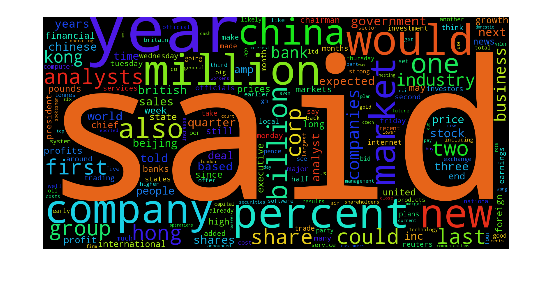

In [11]:
# Creating word cloud Frequency
from wordcloud import WordCloud, STOPWORDS
freq = df_frequency.sum().sort_values()[-2000:].to_dict()

tuples = tuple([tuple(x) for x in freq.items()])

wordcloud = WordCloud(width=1600, height=800).generate_from_frequencies(tuples)
plt.imshow(wordcloud)
plt.axis("off")
plt.figure( figsize=(10,20) )
plt.show()

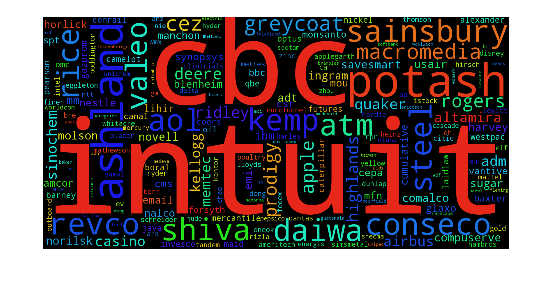

In [12]:
# Creating word cloud TF IDF
most_rel = df.max().sort_values()[-2000:].to_dict()
tuples_tfidf = tuple([tuple(x) for x in most_rel.items()])

wordcloud = WordCloud(width=1600, height=800).generate_from_frequencies(tuples_tfidf)
plt.imshow(wordcloud)
plt.axis("off")
plt.figure( figsize=(10,20) )
plt.show()

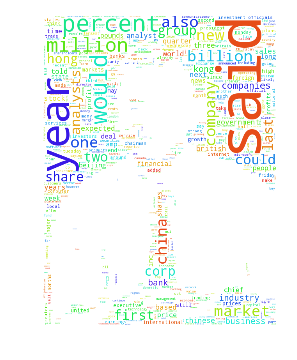

In [13]:
from PIL import Image
import numpy as np

from wordcloud import WordCloud, STOPWORDS

script_dir = os.path.dirname(os.path.expanduser("~/ML/MachingLearning/Lab02/"))
# patternizeimg
alice_mask = np.array(Image.open(os.path.join(script_dir, 'patternizeimg.png')))

stopwords = set(STOPWORDS)
stopwords.add("said")

wc = WordCloud(background_color="white", max_words=2000, mask=alice_mask,
               stopwords=stopwords)
# generate word cloud
wc.generate(text).generate_from_frequencies(tuples)

# show
plt.imshow(wc)
plt.axis("off")
plt.figure()
plt.show()

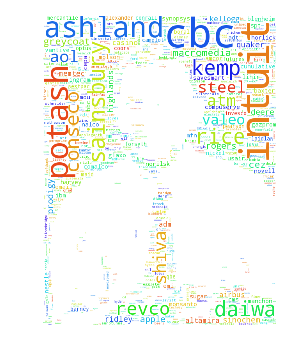

In [14]:
# generate word cloud
wc.generate(text).generate_from_frequencies(tuples_tfidf)

# show
plt.imshow(wc)
plt.axis("off")
plt.figure()
plt.show()

In [15]:
df_frequency.sum().sort_values()[-10:]

billion     3058
china       3154
market      3336
new         3547
company     3778
million     4877
would       5202
percent     5296
year        5386
said       19856
dtype: int64

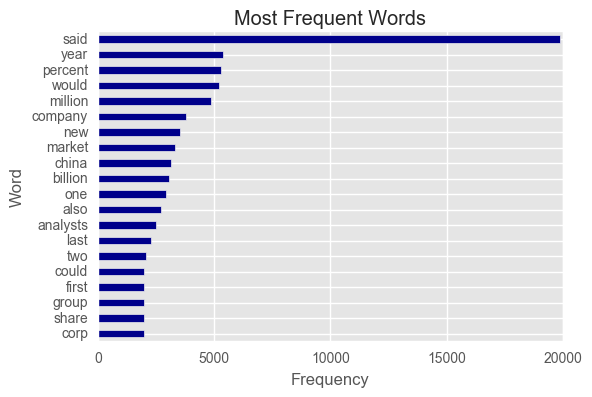

In [16]:
freq = df_frequency.sum().sort_values()[-20:]
ax = freq.plot(kind='barh', legend=False, title='Most Frequent Words', color="DarkBlue")
plt.xlabel("Frequency")
plt.ylabel("Word")

In [17]:
most_rel = df.max().sort_values()[-20:]
most_rel

rogers        0.758104
prodigy       0.760541
cez           0.760783
macromedia    0.760991
greycoat      0.762087
valeo         0.763790
aol           0.770237
atm           0.772200
steel         0.773742
revco         0.774348
shiva         0.776267
conseco       0.777747
kemp          0.784070
rice          0.788661
daiwa         0.790479
sainsbury     0.799519
ashland       0.799767
potash        0.810866
cbc           0.812043
intuit        0.867471
dtype: float64

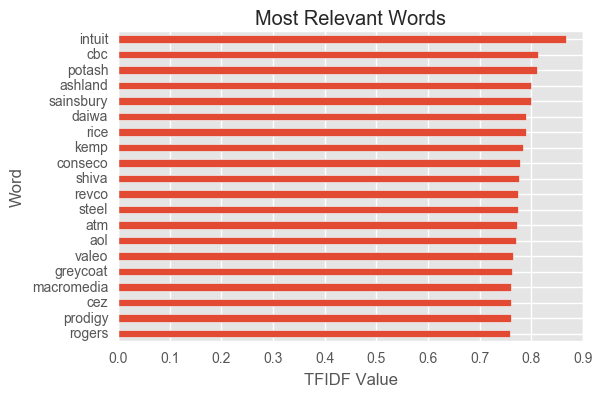

In [18]:
ax = most_rel.plot(kind='barh', legend=False, title='Most Relevant Words')
plt.xlabel("TFIDF Value")
plt.ylabel("Word")

## Word Visualization by Author

Out of the first 50 authors, we will examine the texts of the first 10 authors, organized alphabetically by first name. Since they are all journalists covering corporate and financial topics, we see common words such "said," and "would," as well as "banks" and "markets." The word "said" is the most frequent word in 9 out of the 10 authors we examined, but names of institutions and regions appear more when using TF-IDF. The following sections discuss more about the differences between author's choice of words. We did further research into the backgrounds of these authors, especially where they are based, to understand more of their word choice.

In [19]:
by_author = dict()
for i in range(0, 2500, 50):
    by_author[authors[i]] = cleaned_articles[i:i+50]

### Aaron Pressman

During his time with Reuters, Pressman covered mutual funds, top hedge funds and investments based in the US [[1]](https://www.linkedin.com/in/aaron-pressman-3461b59). This explains why words such as "banks," "financial," and "credit" appear in both graphs, and why "Greenspan" and "CFTC" are ranked highly in relevance. 

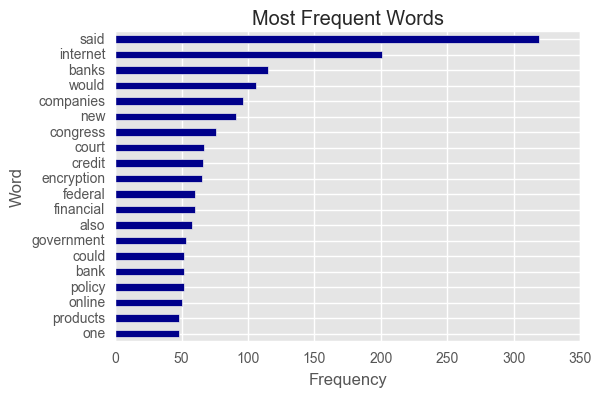

In [20]:
bag_words = count_vect.fit_transform(by_author['AaronPressman'])
df_frequency = pd.DataFrame(data=bag_words.toarray(),columns=count_vect.get_feature_names())
freq = df_frequency.sum().sort_values()[-20:]
ax = freq.plot(kind='barh', legend=False, title='Most Frequent Words', color="DarkBlue")
plt.xlabel("Frequency")
plt.ylabel("Word")

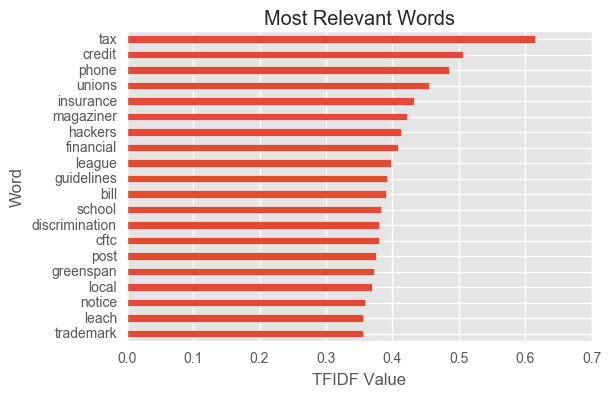

In [21]:
tfidf_mat = tfidf_vect.fit_transform(by_author['AaronPressman'])
df = pd.DataFrame(data=tfidf_mat.toarray(),columns=tfidf_vect.get_feature_names())
most_rel = df.max().sort_values()[-20:]
ax = most_rel.plot(kind='barh', legend=False, title='Most Relevant Words')
plt.xlabel("TFIDF Value")
plt.ylabel("Word")

### Alan Crosby

Crosby's articles also appear to cover markets and banks, but there are words frequently related to Europe and the Czech Republic (i.e. "Czech," "Prague"). Relevant words include "Sporitelna" -- a Czech bank, "Spain," and European names such as "Ferreira" and "Ivanisevic." While Google searches for Alan Crosby does not return much about a specific Alan Crosby at Reuters, there are books about Czech Republic written by Crosby, who lived and covered stories about Eastern Europe. This affirms that while the dataset topic is related, regional topics could play a role in author classification. 

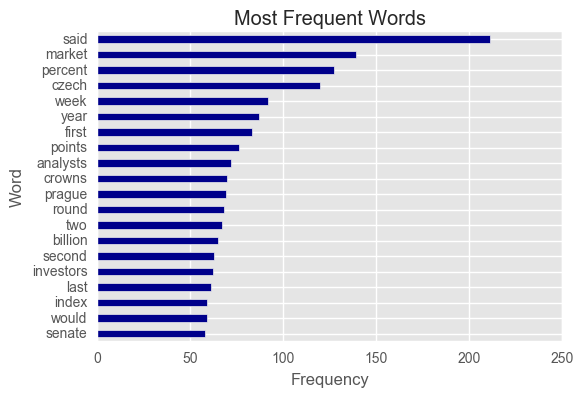

In [22]:
bag_words = count_vect.fit_transform(by_author['AlanCrosby'])
df_frequency = pd.DataFrame(data=bag_words.toarray(),columns=count_vect.get_feature_names())
freq = df_frequency.sum().sort_values()[-20:]
ax = freq.plot(kind='barh', legend=False, title='Most Frequent Words', color="DarkBlue")
plt.xlabel("Frequency")
plt.ylabel("Word")

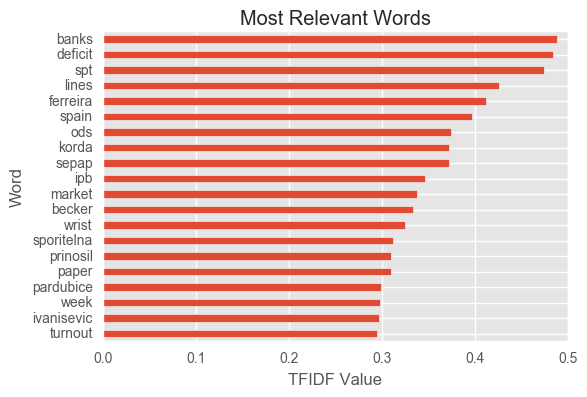

In [23]:
tfidf_mat = tfidf_vect.fit_transform(by_author['AlanCrosby'])
df = pd.DataFrame(data=tfidf_mat.toarray(),columns=tfidf_vect.get_feature_names())
most_rel = df.max().sort_values()[-20:]
ax = most_rel.plot(kind='barh', legend=False, title='Most Relevant Words')
plt.xlabel("TFIDF Value")
plt.ylabel("Word")

### Alexander Smith

Alexander Smith is a London-based editor [[2]](https://twitter.com/alexsmitheditor?lang=en), hence frequent words such as "Britain," "London," and "pounds." His relevant words pertain to British institutions such as "Hambros," "Moorfield," and "Greycoat." 

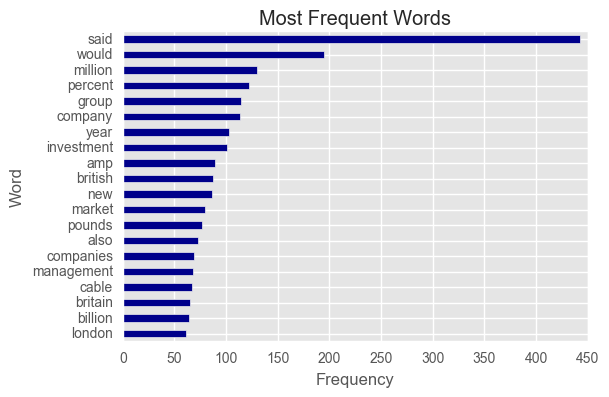

In [24]:
bag_words = count_vect.fit_transform(by_author['AlexanderSmith'])
df_frequency = pd.DataFrame(data=bag_words.toarray(),columns=count_vect.get_feature_names())
freq = df_frequency.sum().sort_values()[-20:]
ax = freq.plot(kind='barh', legend=False, title='Most Frequent Words', color="DarkBlue")
plt.xlabel("Frequency")
plt.ylabel("Word")

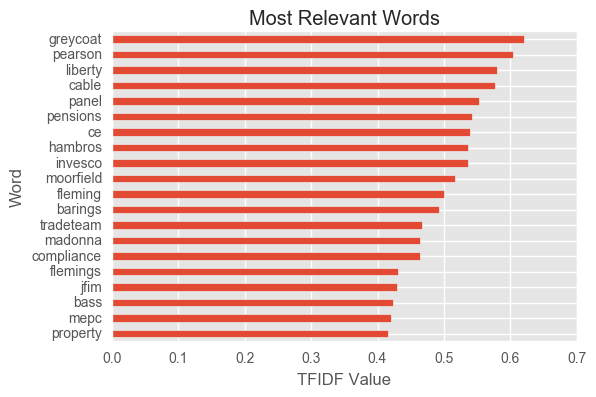

In [25]:
tfidf_mat = tfidf_vect.fit_transform(by_author['AlexanderSmith'])
df = pd.DataFrame(data=tfidf_mat.toarray(),columns=tfidf_vect.get_feature_names())
most_rel = df.max().sort_values()[-20:]
ax = most_rel.plot(kind='barh', legend=False, title='Most Relevant Words')
plt.xlabel("TFIDF Value")
plt.ylabel("Word")

### Benjamin Kang Lim

A quick search on Reuters returns many results of Lim's coverage of China and Asia. While these texts are dated, this explains a much higher frequency of words such as "China," "Beijing," "Taiwan," and "Communist." However, his highly ranked TF-IDF words involve other countries such as "Japan," "Ukraine," and Africa." 

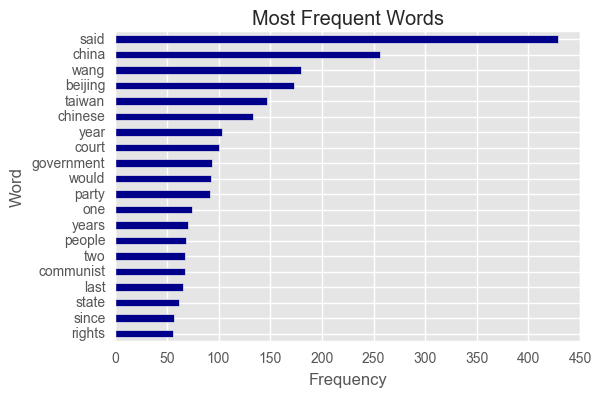

In [26]:
bag_words = count_vect.fit_transform(by_author['BenjaminKangLim'])
df_frequency = pd.DataFrame(data=bag_words.toarray(),columns=count_vect.get_feature_names())
freq = df_frequency.sum().sort_values()[-20:]
ax = freq.plot(kind='barh', legend=False, title='Most Frequent Words', color="DarkBlue")
plt.xlabel("Frequency")
plt.ylabel("Word")

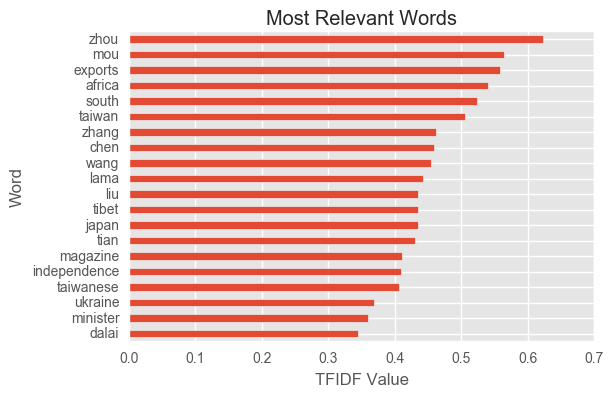

In [27]:
tfidf_mat = tfidf_vect.fit_transform(by_author['BenjaminKangLim'])
df = pd.DataFrame(data=tfidf_mat.toarray(),columns=tfidf_vect.get_feature_names())
most_rel = df.max().sort_values()[-20:]
ax = most_rel.plot(kind='barh', legend=False, title='Most Relevant Words')
plt.xlabel("TFIDF Value")
plt.ylabel("Word")

### Bernard Hickey

Bernard Hickey is based in New Zealand[[3]](https://twitter.com/bernardchickey)[[4]](https://www.linkedin.com/in/bernard-hickey-44334a14), which could explain words regarding "Australia," and "Sydney." This also explains the prevalence of Australian companies ranking highly under TFDIF as compared to other authors. 

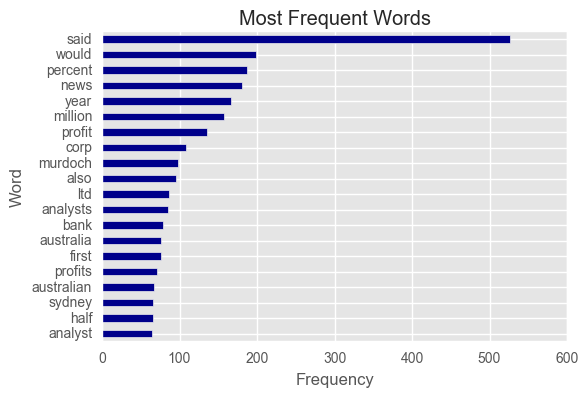

In [28]:
bag_words = count_vect.fit_transform(by_author['BernardHickey'])
df_frequency = pd.DataFrame(data=bag_words.toarray(),columns=count_vect.get_feature_names())
freq = df_frequency.sum().sort_values()[-20:]
ax = freq.plot(kind='barh', legend=False, title='Most Frequent Words', color="DarkBlue")
plt.xlabel("Frequency")
plt.ylabel("Word")

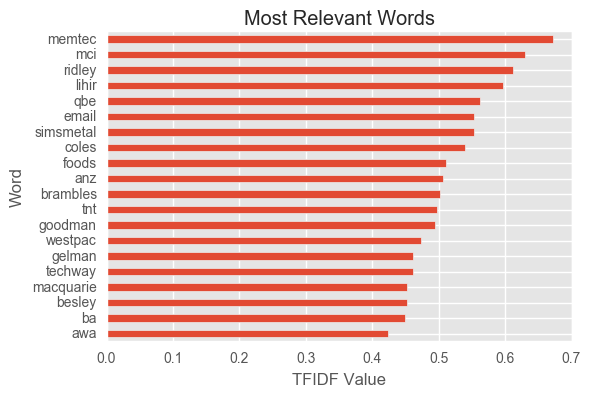

In [29]:
tfidf_mat = tfidf_vect.fit_transform(by_author['BernardHickey'])
df = pd.DataFrame(data=tfidf_mat.toarray(),columns=tfidf_vect.get_feature_names())
most_rel = df.max().sort_values()[-20:]
ax = most_rel.plot(kind='barh', legend=False, title='Most Relevant Words')
plt.xlabel("TFIDF Value")
plt.ylabel("Word")

### Brad Dorfman

Dorfman is based in the US and covered companies such as Wal-Mart and P&G among other US-based corporations, and especially how they do on the market[[5]](https://www.linkedin.com/in/braddorfman). We see a prevalence of words related to the stock market, but we also see a lot of company names under "relevant" words.

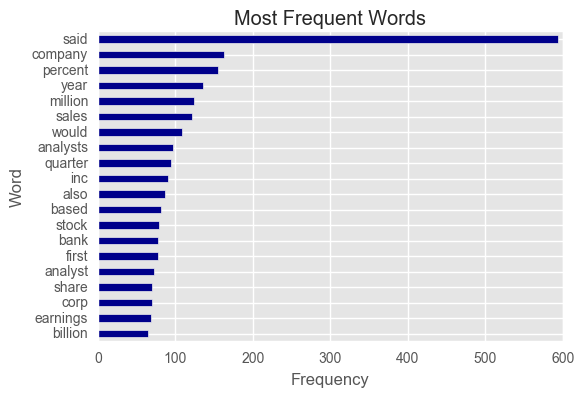

In [30]:
bag_words = count_vect.fit_transform(by_author['BradDorfman'])
df_frequency = pd.DataFrame(data=bag_words.toarray(),columns=count_vect.get_feature_names())
freq = df_frequency.sum().sort_values()[-20:]
ax = freq.plot(kind='barh', legend=False, title='Most Frequent Words', color="DarkBlue")
plt.xlabel("Frequency")
plt.ylabel("Word")

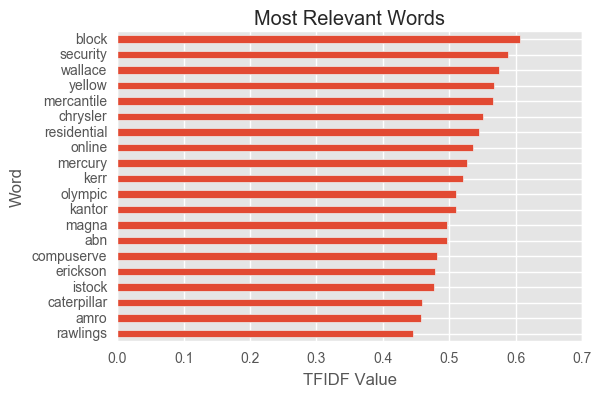

In [31]:
tfidf_mat = tfidf_vect.fit_transform(by_author['BradDorfman'])
df = pd.DataFrame(data=tfidf_mat.toarray(),columns=tfidf_vect.get_feature_names())
most_rel = df.max().sort_values()[-20:]
ax = most_rel.plot(kind='barh', legend=False, title='Most Relevant Words')
plt.xlabel("TFIDF Value")
plt.ylabel("Word")

### Darren Schuettler

Darren Schuettler has been a correspondent for Reuters in South Africa then Asia for a few years now [[6]](https://www.linkedin.com/in/darrenschuettler). But these articles appear based on his time in Canada, so words relating to Canada are common, as well as Canadian topics such as the "Canadiens" and "icewine." The fact that reporters can change topics over time does bring an interesting consideration to classification -- models based on outdated texts may not predict well on an author's current one.

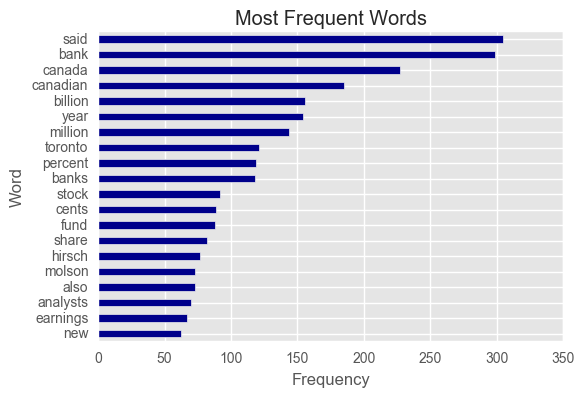

In [32]:
bag_words = count_vect.fit_transform(by_author['DarrenSchuettler'])
df_frequency = pd.DataFrame(data=bag_words.toarray(),columns=count_vect.get_feature_names())
freq = df_frequency.sum().sort_values()[-20:]
ax = freq.plot(kind='barh', legend=False, title='Most Frequent Words', color="DarkBlue")
plt.xlabel("Frequency")
plt.ylabel("Word")

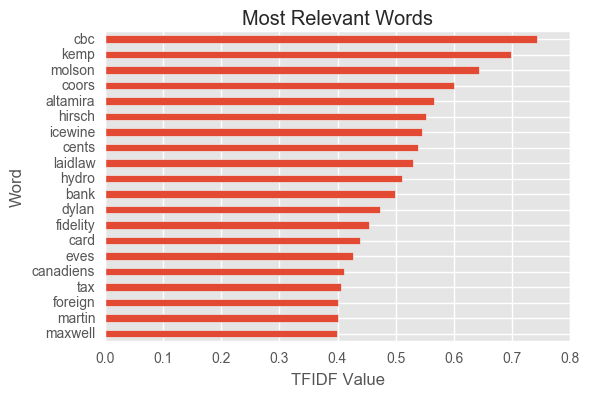

In [33]:
tfidf_mat = tfidf_vect.fit_transform(by_author['DarrenSchuettler'])
df = pd.DataFrame(data=tfidf_mat.toarray(),columns=tfidf_vect.get_feature_names())
most_rel = df.max().sort_values()[-20:]
ax = most_rel.plot(kind='barh', legend=False, title='Most Relevant Words')
plt.xlabel("TFIDF Value")
plt.ylabel("Word")

### David Lawder

David Lawder covers "global economy, trade" according to his twitter [[7]](https://twitter.com/davelawder?ref_src=twsrc%5Egoogle%7Ctwcamp%5Eserp%7Ctwgr%5Eauthor). However, his most frequent words in these articles cover auto companies and auto industry related terms. He may have been a closely covering the auto crisis, but the theme of his most relevant words are less obvious. 

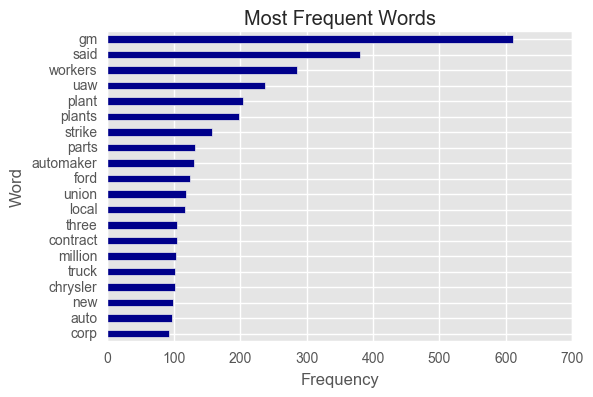

In [34]:
bag_words = count_vect.fit_transform(by_author['DavidLawder'])
df_frequency = pd.DataFrame(data=bag_words.toarray(),columns=count_vect.get_feature_names())
freq = df_frequency.sum().sort_values()[-20:]
ax = freq.plot(kind='barh', legend=False, title='Most Frequent Words', color="DarkBlue")
plt.xlabel("Frequency")
plt.ylabel("Word")

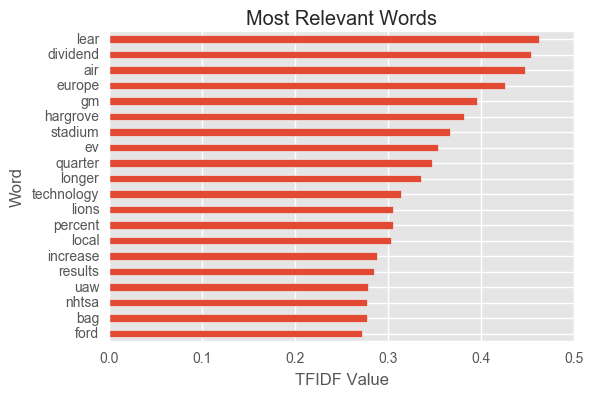

In [35]:
tfidf_mat = tfidf_vect.fit_transform(by_author['DavidLawder'])
df = pd.DataFrame(data=tfidf_mat.toarray(),columns=tfidf_vect.get_feature_names())
most_rel = df.max().sort_values()[-20:]
ax = most_rel.plot(kind='barh', legend=False, title='Most Relevant Words')
plt.xlabel("TFIDF Value")
plt.ylabel("Word")

### Edna Fernandes

According to her website, Edna Fernandes is a political correspondent for Reuters in London [[8]](http://www.ednafernandes.com/author/). Some European and British related words appear in her most frequent list, but upon quick glance, her "most relevant" words appear to cover a wide array of topics. 

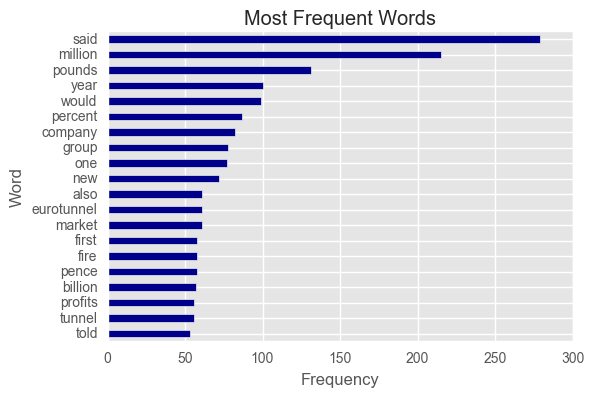

In [36]:
bag_words = count_vect.fit_transform(by_author['EdnaFernandes'])
df_frequency = pd.DataFrame(data=bag_words.toarray(),columns=count_vect.get_feature_names())
freq = df_frequency.sum().sort_values()[-20:]
ax = freq.plot(kind='barh', legend=False, title='Most Frequent Words', color="DarkBlue")
plt.xlabel("Frequency")
plt.ylabel("Word")

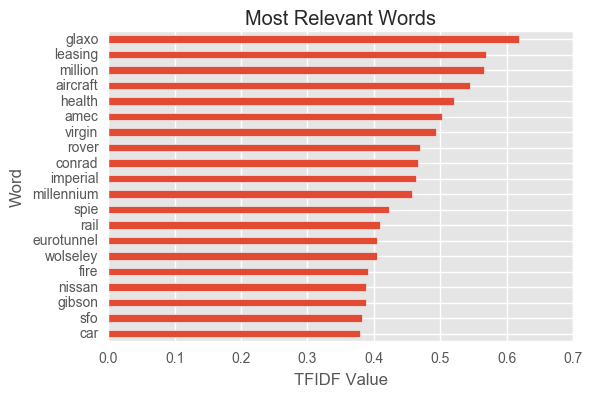

In [37]:
tfidf_mat = tfidf_vect.fit_transform(by_author['EdnaFernandes'])
df = pd.DataFrame(data=tfidf_mat.toarray(),columns=tfidf_vect.get_feature_names())
most_rel = df.max().sort_values()[-20:]
ax = most_rel.plot(kind='barh', legend=False, title='Most Relevant Words')
plt.xlabel("TFIDF Value")
plt.ylabel("Word")

### Eric Auchard

Eric Auchard is "chief tech correspondent, Europe, Mideast & Africa, Frankfurt" [[9]](http://blogs.reuters.com/eric-auchard/). This explains why software and technology related words appear in both of his lists. This shows that their are still different topics that could assist identify works of different authors, or at least group them. Multiple authors may cover the same topic, but word frequency and relevance may help group texts into different industries (e.g. technology, banking, etc.) and regions (e.g. US, Europe, Asia, etc.). 

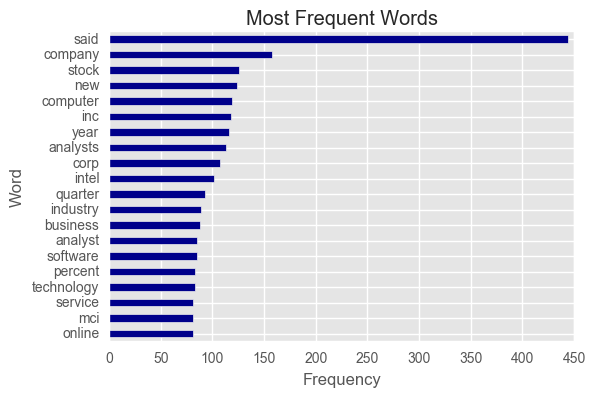

In [38]:
bag_words = count_vect.fit_transform(by_author['EricAuchard'])
df_frequency = pd.DataFrame(data=bag_words.toarray(),columns=count_vect.get_feature_names())
freq = df_frequency.sum().sort_values()[-20:]
ax = freq.plot(kind='barh', legend=False, title='Most Frequent Words', color="DarkBlue")
plt.xlabel("Frequency")
plt.ylabel("Word")

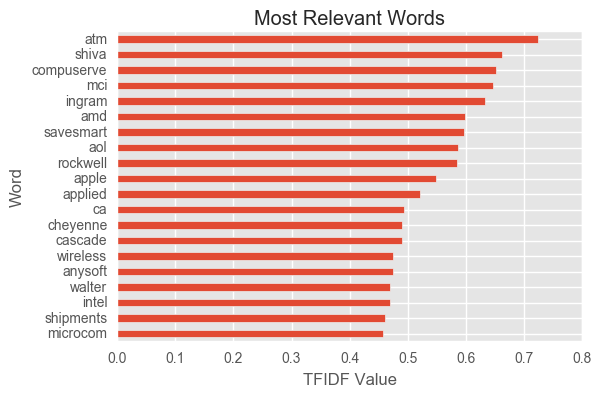

In [39]:
tfidf_mat = tfidf_vect.fit_transform(by_author['EricAuchard'])
df = pd.DataFrame(data=tfidf_mat.toarray(),columns=tfidf_vect.get_feature_names())
most_rel = df.max().sort_values()[-20:]
ax = most_rel.plot(kind='barh', legend=False, title='Most Relevant Words')
plt.xlabel("TFIDF Value")
plt.ylabel("Word")

In [40]:
vocab_by_author = dict()
for author in by_author: 
    bag_words = count_vect.fit_transform(by_author[author])
    df_frequency = pd.DataFrame(data=bag_words.toarray(),columns=count_vect.get_feature_names())
    tfidf_mat = tfidf_vect.fit_transform(by_author[author])
    df = pd.DataFrame(data=tfidf_mat.toarray(),columns=tfidf_vect.get_feature_names())
    vocab_by_author[author] = len(count_vect.vocabulary_)

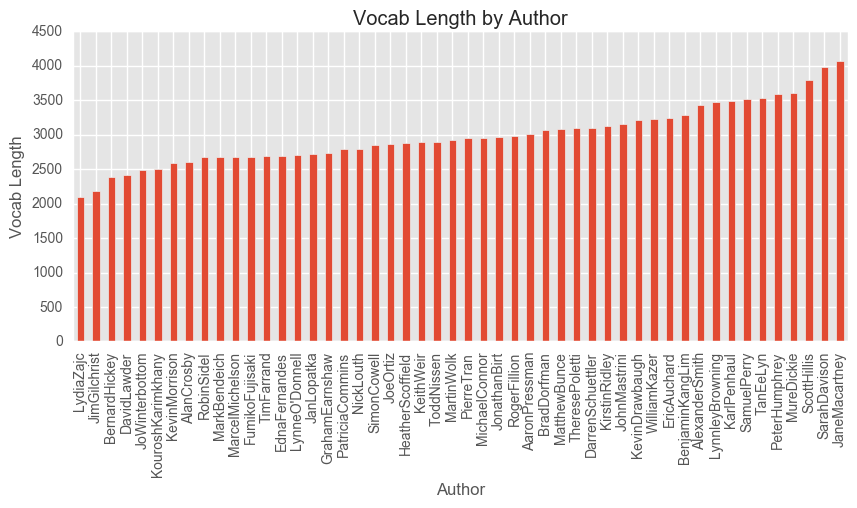

In [41]:
vocab_df = pd.Series(vocab_by_author).sort_values()
vocab_df.plot(kind='bar', figsize=(10, 4), title="Vocab Length by Author")
plt.xlabel("Author")
plt.ylabel("Vocab Length")